In [ ]:
from keras.datasets import imdb


In [ ]:
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word , i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[4]])
print('---label---')
print(y_train[4])


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
---review with words---
['the', 'sure', 'themes', 'br', 'only', 'acting', 'i', 'i', 'was', 'favourite', 'as', 'on', 'she', 'they', 'hat', 'but', 'already', 'most', 'was', 'scares', 'minor', 'if', 'flash', 'was', 'well', 'also', 'good', '8', 'older', 'was', 'with', 'enjoy', 'used', 'enjoy', 'phone', 'too', "i'm", 'of', 'you', 'an', 'job', 'br', 'only', 'women', 'than', 'robot', 'to', 'was', 'with', 'these', 'unexpected', 'sure', 'little', 'sure', 'guy', 'sure', 'on', 'was', 'one', 'your', 'life', 'was', 'children', 'in', 'particularly', 'only', 'yes', 'she', 'sort', 'is', 'jerry', 'but', 'so', 'stories', 'them', 'final', 'known', 'to', 'have', 'does', 'such', 'most', 'that', 'supposed', 'imagination', 'very', 'moving', 'and', 'only', 'yes', 'this', 'was', 'seconds', 'for', 'imagination', 'on', 'this', 'of', 'and', 'to', 'plays', 'that', 'nights', 'to', 'for', 'supposed', 'still', 'been', 'last', 'fan', 'always', 'your', 'bit', 'that', 'st

In [ ]:
from keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense,Dropout


In [ ]:
import numpy as np
vocabulary_size = 5000
max_words = 100
embedding_size = 32

model = Sequential()
model.add(Embedding(vocabulary_size,embedding_size,input_length=max_words ))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

dummy_input = np.zeros((1, max_words))  # A batch size of 1 with `max_words` length
model.predict(dummy_input)
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (1, 100, 32)                │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (1, 100)                    │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 100)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 1)                      │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,301 (833.21 KB)

 Trainable params: 213,301 (833.21 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 7

X_valid,y_valid = X_train[:batch_size],y_train[:batch_size]
X_train2,y_train2=X_train[batch_size:], y_train[batch_size:]

history =model.fit(X_train2,y_train2,validation_data=(X_valid,y_valid),batch_size=batch_size,epochs=num_epochs)


Epoch 1/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6383 - loss: 0.6152 - val_accuracy: 0.7812 - val_loss: 0.4267
Epoch 2/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8470 - loss: 0.3619 - val_accuracy: 0.8906 - val_loss: 0.2685
Epoch 3/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8920 - loss: 0.2717 - val_accuracy: 0.9375 - val_loss: 0.2474
Epoch 4/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9037 - loss: 0.2510 - val_accuracy: 0.9531 - val_loss: 0.1999
Epoch 5/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8737 - loss: 0.3067 - val_accuracy: 0.9531 - val_loss: 0.2093
Epoch 6/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9250 - loss: 0.2025 - val_accuracy: 0.9062 - val_loss: 0.1783
Epoch 7/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9375 - loss: 0.1717 - val_accuracy: 0.9062 - val_loss: 0.2034


In [ ]:
predictions = model.predict(X_test)

prediction_classes = (predictions>0.5).astype("int32")

for i in range(20):
  print(f"predicted{prediction_classes[i]},Actual: {y_test[i]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
predicted[0],Actual: 0
predicted[1],Actual: 1
predicted[1],Actual: 1
predicted[1],Actual: 0
predicted[1],Actual: 1
predicted[1],Actual: 1
predicted[1],Actual: 1
predicted[0],Actual: 0
predicted[1],Actual: 0
predicted[1],Actual: 1
predicted[1],Actual: 1
predicted[0],Actual: 0
predicted[0],Actual: 0
predicted[0],Actual: 0
predicted[1],Actual: 1
predicted[0],Actual: 0
predicted[1],Actual: 1
predicted[1],Actual: 0
predicted[0],Actual: 0
predicted[0],Actual: 0


In [ ]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

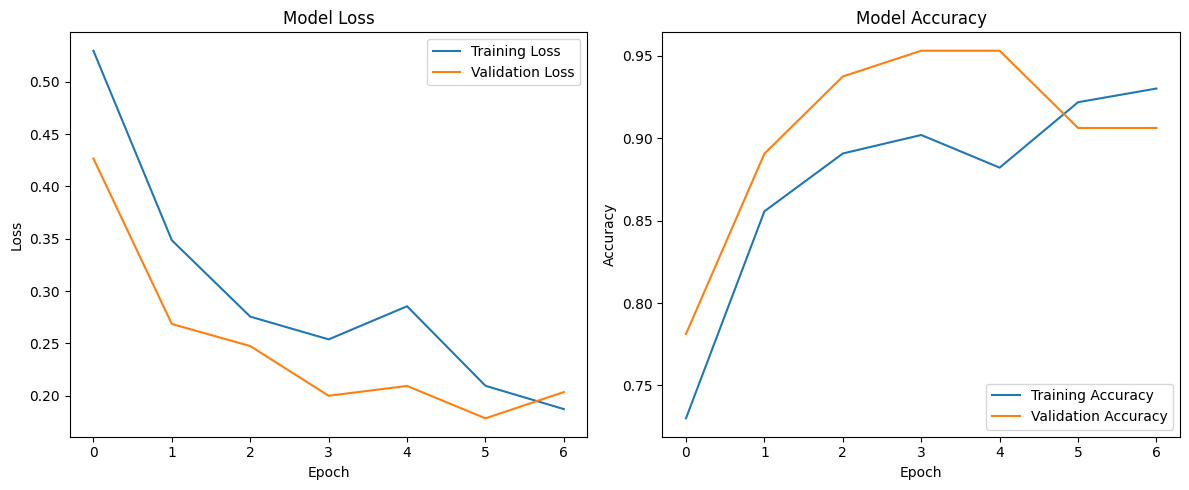

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


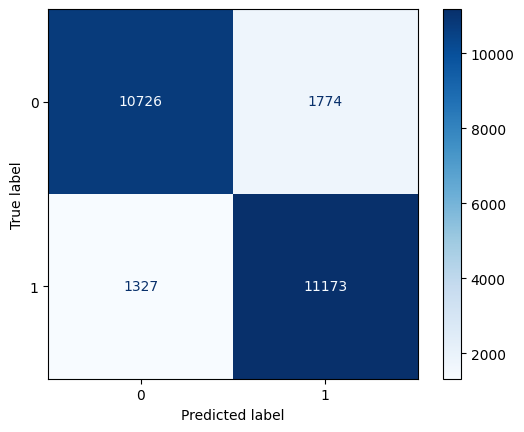

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import files

# Download the model file
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the model file
uploaded = files.upload()

# After uploading, the file should be available in the current directory


Saving my_model.h5 to my_model (1).h5


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.h5')

# Check the model architecture
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (1, 100, 32)                │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (1, 100)                    │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 100)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 1)                      │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,303 (833.22 KB)

 Trainable params: 213,301 (833.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)